# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix for X_train
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]
    
    # Step 2: Compute eigenvalues and eigenvectors for the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Step 4: Select the top `n_components` eigenvectors (i.e., singular vectors)
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 5: Project the data onto the reduced dimension space
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)
    
    return X_train_reduced, X_test_reduced, top_eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [6]:
# svd_components = [784]  # You need to decide what number to search...
svd_components = [10, 50, 100, 200, 300, 500, 784]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Store results
    results.append({
        "components": n_components,
        "accuracy": accuracy,
        "training_time": training_time
    })

Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 0.2838 seconds
Applying custom SVD with 50 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 3.8719 seconds
Applying custom SVD with 100 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 15.5949 seconds
Applying custom SVD with 200 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 45.0742 seconds
Applying custom SVD with 300 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 82.6515 seconds
Applying custom SVD with 500 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 181.6817 seconds
Applying custom SVD with 784 components...


/Users/paulaLburgos/Documents/BU/F24/cs506/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 311.4882 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


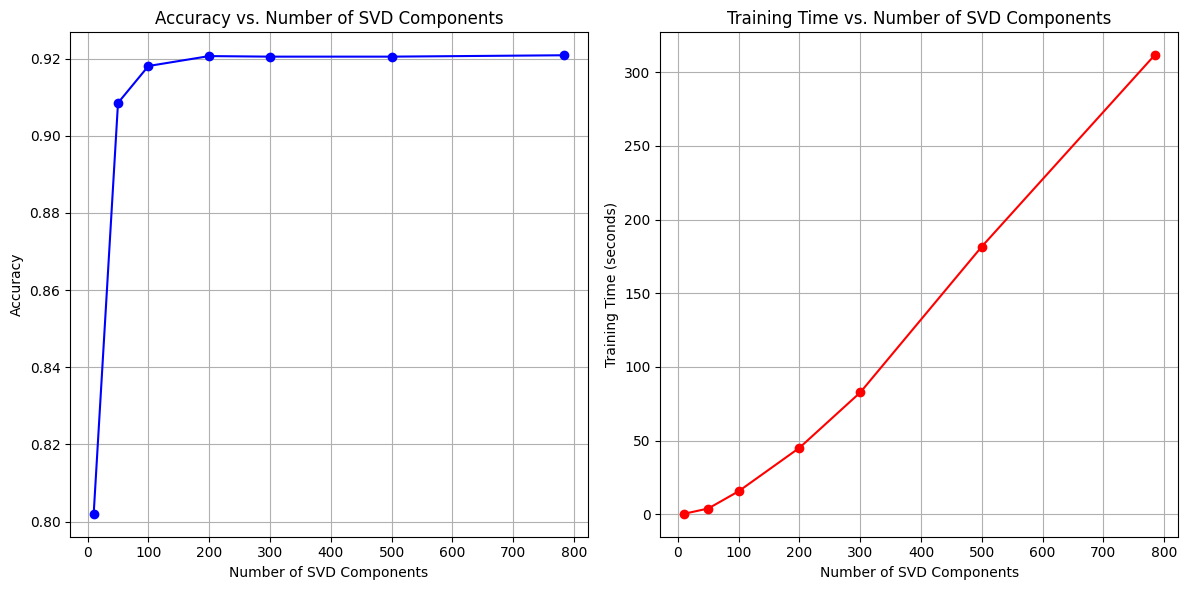

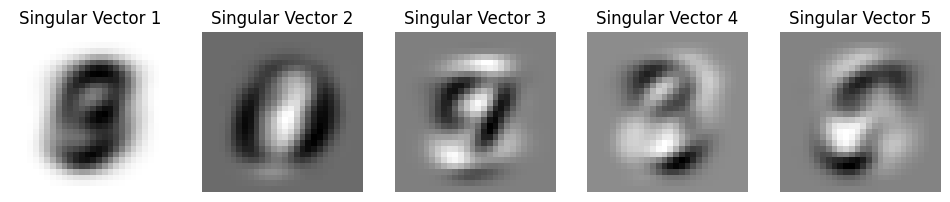

In [7]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

import matplotlib.pyplot as plt

# Assuming you have stored the results as a list of dictionaries
# results = [{'components': ..., 'accuracy': ..., 'training_time': ...}, ...]

# Extracting components, accuracies, and training times from results
components = [result['components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', color='b', label='Accuracy')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='r', label='Training Time (s)')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize Top 5 Singular Vectors
def visualize_top_singular_vectors(U_matrix, num_vectors=5):
    """
    Visualizes the top singular vectors from the U matrix by reshaping them into 28x28 images.
    
    Args:
        U_matrix: Left singular vectors (U from SVD)
        num_vectors: Number of top singular vectors to visualize
    """
    plt.figure(figsize=(12, 6))
    for i in range(num_vectors):
        singular_vector = U_matrix[:, i].reshape(28, 28)
        plt.subplot(1, num_vectors, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.show()

# Assuming U is the matrix of left singular vectors (from your apply_svd_custom function)
visualize_top_singular_vectors(top_eigenvectors, num_vectors=5)

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [ ]:
# The accuracy quickly improves when increasing the number of SVD components up to around 100 components, and after that, the accuracy starts to plateau at 92%, with very little improvement beyond this.
# This suggests that most of the essential information in the data is captured by the first 100 singular vectors, and adding more components beyond that does not yield much improvement in the model’s performance. Therefore,using around 100 to 200 components seems like the sweet spot for balancing accuracy and efficiency.

# As expected, the training time increases as the number of components increases. The relationship appears to be roughly quadratic, indicating that higher-dimensional data requires more computation. There is a clear trade-off between using more components to boost accuracy and the extra time it takes to train the model. 
# This steep increase in training time after 100-200 components suggests that beyond this point, the computational cost outweighs the relatively small gains in accuracy.

# The top 5 singular vectors represent the "directions" in the data that capture the most variance.
# These vectors confirm that SVD is capturing the most significant patterns in the MNIST dataset. The first few singular vectors generally capture the most important structural information in the data, which is why the accuracy rises quickly with just a few components.